## Rule Based
- 通过确定的规则来生成合理的语句

In [43]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [44]:
import random

In [45]:
def adj(): 
    return random.choice('蓝色的|好看的|小小的'.split('|')).split()[0]
adj()

'蓝色的'

In [46]:
def adj_star():
    return random.choice([None, adj() + adj_star()])
adj_star()

# choice 需要先执行完被选择列表中的内容再选择，所以出现无限递归的问题

RecursionError: maximum recursion depth exceeded while calling a Python object

In [47]:
def adj_star():
    return random.choice([lambda:'',lambda: adj() + adj_star()])()

# 被选择的列表为匿名函数，不会立即执行

In [48]:
adj_star()

'好看的'

- 如果更换了语法，会发现所有写过的程序，都需要重写

In [49]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [1]:
def create_grammar(grammar_str, split='=>',line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [51]:
grammar = create_grammar(adj_grammar)
grammar

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [52]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [3]:
import random
choice = random.choice 
def generate(gram, target):
    if target not in gram:
        return target
    expanded = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e for e in expanded if e!= 'null'])

In [54]:
example_grammar = create_grammar(simple_grammar)
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [55]:
generate(gram=example_grammar, target='sentence')

'一个女人坐在一个桌子'

In [56]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好, | 您好,
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [57]:
for i in range(10):
    print(generate(gram=create_grammar(host, split='='), target='host'))
    print(generate(gram=create_grammar(human, split='='), target='human'))
    print()

小朋友,你好,我是3号,请问你要赌博吗？
俺找找玩的

先生,您好,我是98号,请问你要打猎吗？
我们想找点乐子

女士,您好,我是9号,请问你要打猎吗？
我们找找玩的

您好,我是18号,您需要喝酒吗？
我想找点乐子

您好,我是6819号,您需要喝酒吗？
俺找找乐子

您好,我是3号,请问你要喝酒吗？
我找找乐子

您好,我是524号,请问你要赌博吗？
我们想找点玩的

您好,我是3号,请问你要打猎吗？
我找找乐子

你好,我是757353989号,请问你要喝酒吗？
我们找找乐子

您好,我是5号,请问你要赌博吗？
我找找玩的



## Probability Based
- Language Model:
- 通过语句出现的概率判断真实性
$$ language\_model(String) = Probability(String) \in (0, 1) $$
- 每个 String 又由连续的单词组成
$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 
$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 


In [1]:
import pandas as pd
import jieba

In [5]:
def cut(string):return list(jieba.cut(string))

In [6]:
TOKEN=[]

In [14]:
for i, line in enumerate(open('data/article_9k.txt',encoding='utf-8')):
    if i % 1000 == 0:
        print(i)
    TOKEN += cut(line)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000


In [15]:
from collections import Counter

In [16]:
words_count = Counter(TOKEN)

In [17]:
words_count.most_common(100)

[('的', 734343),
 ('n', 382020),
 ('在', 271674),
 ('月', 191895),
 ('日', 168071),
 ('新华社', 142579),
 ('和', 138537),
 ('了', 128831),
 ('年', 125182),
 ('是', 106107),
 ('\n', 90882),
 ('１', 88501),
 ('０', 85260),
 ('外代', 83268),
 ('中', 75746),
 ('中国', 72904),
 ('２', 70808),
 ('2017', 70207),
 ('将', 63710),
 ('记者', 62961),
 ('二线', 62021),
 ('与', 60023),
 ('等', 59883),
 ('为', 58824),
 ('5', 55275),
 ('照片', 52341),
 ('对', 52211),
 ('4', 52116),
 ('也', 50126),
 ('上', 49122),
 ('有', 48272),
 ('５', 41008),
 ('说', 40136),
 ('他', 39226),
 ('发展', 38352),
 ('以', 37652),
 ('３', 37110),
 ('国际', 36264),
 ('nn', 35330),
 ('４', 34766),
 ('比赛', 32540),
 ('到', 31585),
 ('人', 30977),
 ('６', 30700),
 ('从', 30684),
 ('6', 30532),
 ('都', 29849),
 ('不', 29652),
 ('后', 28653),
 ('就', 28320),
 ('并', 27754),
 ('当日', 27227),
 ('国家', 26958),
 ('被', 26885),
 ('进行', 26856),
 ('企业', 26744),
 ('７', 26542),
 ('美国', 26245),
 ('3', 26064),
 ('北京', 25772),
 ('这', 25546),
 ('举行', 25515),
 ('体育', 24940),
 ('2', 24813),
 ('但', 

In [18]:
frequencies = [f for w, f in words_count.most_common(1000)]
x = [i for i in range(1000)]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

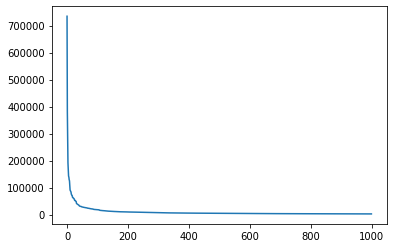

In [20]:
plt.plot(x, frequencies)

In [21]:
import numpy as np

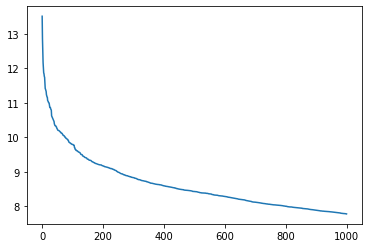

In [22]:
plt.plot(x, np.log(frequencies))

In [23]:
def prob_1(word):return words_count[word]/len(TOKEN)

In [24]:
prob_1('我们')

0.0011575791460642915

In [25]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [26]:
TOKEN = [str(t) for t in TOKEN]

In [29]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN)-2)]

In [30]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [31]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [33]:
def prob_2(word1, word2):
    if word1+word2 in words_count_2:
        return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [34]:
prob_2('我们','在')

3.1073369891015514e-05

In [35]:
prob_2('我们','去')

3.079838431675874e-06

In [36]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [37]:
get_probability('小明明天抽到一台苹果手机')

2.6163923982656883e-35

In [38]:
get_probability('小明明天抽到一台波音飞机')

7.044133379946084e-36

In [40]:
get_probability('洋葱奶昔来一杯')

1.6634881864949532e-22

In [42]:
get_probability('养乐多绿来一杯')

3.0246826419731214e-15

In [58]:
for sen in [generate(gram=example_grammar, target='sentence') for _ in range(20)]:
    print('sentence:{} with prob {}'.format(sen, get_probability(sen)))

sentence:一个好看的小小的小小的女人看见这个女人 with prob 3.615788364161681e-56
sentence:这个蓝色的蓝色的桌子看着一个好看的好看的女人 with prob 2.8288313297977863e-76
sentence:这个女人听着这个女人 with prob 4.437804029366033e-33
sentence:这个小猫听着一个篮球 with prob 3.645339024122098e-33
sentence:这个好看的好看的桌子听着这个小猫 with prob 1.627863426753648e-58
sentence:一个小小的好看的桌子听着一个桌子 with prob 8.284607293353622e-51
sentence:这个蓝色的女人坐在一个蓝色的小小的小小的好看的小猫 with prob 5.749657174385743e-79
sentence:一个好看的小猫看见一个小猫 with prob 2.465568915427967e-40
sentence:一个女人看见这个篮球 with prob 3.2935338304752606e-28
sentence:一个桌子听着一个小小的蓝色的女人 with prob 1.5364180798583082e-49
sentence:这个蓝色的篮球听着这个小猫 with prob 8.21484467545431e-45
sentence:一个桌子看见这个好看的桌子 with prob 6.574850441141246e-41
sentence:一个小猫坐在这个女人 with prob 1.8297410169307e-29
sentence:一个篮球看见这个篮球 with prob 3.6594820338614e-29
sentence:这个篮球坐在一个桌子 with prob 1.09784461015842e-28
sentence:这个小猫看着一个女人 with prob 8.233834576188152e-29
sentence:一个好看的小小的小猫坐在这个好看的好看的蓝色的好看的小小的女人 with prob 1.2455684071386804e-106
sentence:一个桌子看见一个蓝色的女人 with prob 

In [59]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    better = s1 if p1 > p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.173347900261814e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.2419130858638937e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.483087743951401e-34
---- 真是一只好看的小猫 with probility 8.151496230426271e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.593134482829099e-20
---- 今晚火锅去吃我 with probility 6.861528813490126e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.6634881864949532e-22
---- 养乐多绿来一杯 with probility 3.0246826419731214e-15


## 编程实践部分

#### 1. 设计你自己的句子生成器

In [45]:
def create_grammar(grammar_str, split='=', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar     

In [46]:
import random
choice = random.choice

def generate(gram, target):
    if target not in gram: return target 
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return "".join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

第一个语法

In [47]:
Groot = """
groot = I  am  name
name = 'Groot | G'root | Groo't
"""

In [83]:
generate(gram=create_grammar(Groot), target='groot')

"IamG'root"

第二个语法

In [62]:
service_robot = """
ask = 打招呼 , 自我介绍 , 询问 

打招呼 = 称谓 , 招呼 
称谓 = 亲 | 先生 | 女士 | 小朋友 | 美女| 帅哥
人称 = 你 | 您 
招呼 = 人称 好

自我介绍 = 我是 数字 号客服|我是客服 名称
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
名称 = 小芳 | 小静 | 张三 | 王五

询问 = 人称 动作 结尾
动作 = 想知道 业务+ | 想了解 业务+ |想咨询 业务+ | 对 业务+ 感兴趣
业务+ = 业务 | 业务 和 业务+ 
业务 = 产品详情 | 购买须知 | 优惠券 | 使用方法 | 订单查询 | 产品维修 | 退货流程 | 退款详情 | 人工客服 
结尾 = 吗？ 
"""

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

In [63]:
example_gram=create_grammar(service_robot)
example_gram

{'ask': [['打招呼', ',', '自我介绍', ',', '询问']],
 '打招呼': [['称谓', ',', '招呼']],
 '称谓': [['亲'], ['先生'], ['女士'], ['小朋友'], ['美女'], ['帅哥']],
 '人称': [['你'], ['您']],
 '招呼': [['人称', '好']],
 '自我介绍': [['我是', '数字', '号客服'], ['我是客服', '名称']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']],
 '名称': [['小芳'], ['小静'], ['张三'], ['王五']],
 '询问': [['人称', '动作', '结尾']],
 '动作': [['想知道', '业务+'], ['想了解', '业务+'], ['想咨询', '业务+'], ['对', '业务+', '感兴趣']],
 '业务+': [['业务'], ['业务', '和', '业务+']],
 '业务': [['产品详情'],
  ['购买须知'],
  ['优惠券'],
  ['使用方法'],
  ['订单查询'],
  ['产品维修'],
  ['退货流程'],
  ['退款详情'],
  ['人工客服']],
 '结尾': [['吗？']]}

In [71]:
generate(gram=example_gram, target='ask')

'亲,您好,我是客服小芳,您想咨询退款详情和退货流程吗？'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [72]:
def generate_n(n, gram, target):
    return [generate(gram, target) for _ in range(n)]

In [75]:
generate_n(n=5, gram=example_gram, target='ask')

['小朋友,你好,我是9号客服,你想了解人工客服吗？',
 '亲,你好,我是57号客服,您想咨询优惠券和订单查询吗？',
 '帅哥,你好,我是34764号客服,您想知道产品详情和产品维修和使用方法和优惠券吗？',
 '先生,你好,我是客服小芳,您想知道产品维修和退款详情和购买须知吗？',
 '小朋友,您好,我是客服王五,您想知道产品详情吗？']

#### 2. 使用新数据源完成语言模型的训练

In [228]:
import pandas as pd
content = pd.read_csv('data/movie_comments.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [229]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [230]:
len(content)

261497

In [231]:
comments = content['comment'].tolist()

In [232]:
len(comments)

261497

In [240]:
import re
def token(string):
    return re.sub('[^\w]', '', string)

In [241]:
comments_clean = [token(str(s)) for s in comments]

In [242]:
len(comments_clean)

261497

In [244]:
comments_clean[:10]

['吴京意淫到了脑残的地步看了恶心想吐',
 '首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹',
 '吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余',
 '凭良心说好看到不像战狼1的续集完虐湄公河行动',
 '中二得很',
 '犯我中华者虽远必诛吴京比这句话还要意淫一百倍',
 '脑子是个好东西希望编剧们都能有',
 '三星半实打实的7分第一集在爱国主旋律内部做着各种置换与较劲但第二集才真正显露吴京的野心他终于抛弃李忠志了新增外来班底让硬件实力有机会和国际接轨开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶在理念上它甚至做到绣春刀2最想做到的那部分',
 '开篇长镜头惊险大气引人入胜结合了水平不俗的快剪下实打实的真刀真枪让人不禁热血沸腾特别弹簧床架挡炸弹空手接碎玻璃弹匣割喉等帅得飞起就算前半段铺垫节奏散漫主角光环开太大等也不怕作为一个中国人两个小时弥漫着中国强大得不可侵犯的氛围还是让那颗民族自豪心砰砰砰跳个不停',
 '15100吴京的冷峰在这部里即像成龙又像杰森斯坦森但体制外的同类型电影主角总是代表个人无能的政府需要求助于这些英雄才能解决难题体现的是个人的价值所以主旋律照抄这种模式实际上是有问题的我们以前嘲笑个人英雄主义却没想到捆绑爱国主义的全能战士更加难以下咽']

In [245]:
import jieba
def cut(string):
    return list(jieba.cut(string))

In [248]:
TOKEN=[w for s in comments_clean for w in cut(s) ]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangbin\AppData\Local\Temp\jieba.cache
Loading model cost 1.150 seconds.
Prefix dict has been built succesfully.


In [250]:
TOKEN[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [251]:
from collections import Counter
words_count = Counter(TOKEN)
words_count.most_common(20)

[('的', 328262),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290),
 ('在', 31245),
 ('不', 28435),
 ('有', 27939),
 ('就', 25685),
 ('人', 23909),
 ('好', 22858),
 ('啊', 20803),
 ('这', 17484),
 ('还', 17449),
 ('一个', 17343)]

In [252]:
def prob_1(word):
    return words_count[word]/len(TOKEN)

In [253]:
prob_1('的')

0.07310448068987618

In [254]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN)-2)]

In [255]:
TOKEN_2_GRAM[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [256]:
words_count_2 = Counter(TOKEN_2_GRAM)
words_count_2.most_common(10)

[('的电影', 8640),
 ('看的', 7106),
 ('都是', 6335),
 ('让人', 5284),
 ('的故事', 4709),
 ('看了', 4585),
 ('也是', 4408),
 ('的时候', 4398),
 ('的人', 4356),
 ('的是', 4348)]

In [257]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [258]:
prob_2('看','了')

0.0010210874035228295

In [331]:
def get_probability(sentence):
    sentence = token(sentence)
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [338]:
for _ in range(5):
    sen = generate(gram=example_gram, target='ask')
    prob = get_probability(sen)
    words = cut(token(sen))
    print('sentence: {} with Prb: {}'.format(sen, prob))
#     for i, word in enumerate(words[:-1]):
#         next_ = words[i+1]
#         probability = prob_2(word, next_)
#         print('-'*8 + '  words:{}{} with Prb:{}'.format(word, next_, probability))
    

sentence: 亲,你好,我是客服小静,你对退款详情和产品详情和订单查询感兴趣吗？ with Prb: 4.565505428340485e-108
sentence: 美女,您好,我是客服小芳,你对优惠券和产品详情和优惠券感兴趣吗？ with Prb: 1.1506724609964677e-95
sentence: 帅哥,你好,我是7号客服,您想了解产品详情和人工客服和退款详情和使用方法和人工客服吗？ with Prb: 1.768282302897576e-152
sentence: 亲,你好,我是客服张三,你想了解使用方法吗？ with Prb: 4.10014688561693e-66
sentence: 先生,您好,我是客服小芳,你想了解人工客服吗？ with Prb: 1.708394535673721e-67


In [345]:
test_1 = comments_clean[0]
print('0'+ ' sentence: {} with Prb: {}'.format(test_1, get_probability(test_1)))
print()
for i in range(1, 10):
    words = cut(test_1)
    random.shuffle(words)
    test_2 = ''.join(words)
    print(str(i) + ' sentence: {} with Prb: {}'.format(test_2, get_probability(test_2)))
    print()

0 sentence: 吴京意淫到了脑残的地步看了恶心想吐 with Prb: 1.3855036147011206e-57

1 sentence: 地步了想吴京吐到恶心看脑残了意淫的 with Prb: 6.860184210973945e-54

2 sentence: 吴京的到看了想脑残吐恶心地步意淫了 with Prb: 4.160609084510495e-58

3 sentence: 了看脑残恶心想了吐地步的吴京意淫到 with Prb: 8.85146715394411e-68

4 sentence: 恶心地步吴京的看意淫吐到了了脑残想 with Prb: 1.5434569843418933e-60

5 sentence: 吴京意淫到了想了看恶心吐脑残地步的 with Prb: 4.901057363138853e-62

6 sentence: 吴京了恶心了意淫看想脑残地步的吐到 with Prb: 6.493232159032491e-62

7 sentence: 吐想到了的吴京了地步恶心脑残看意淫 with Prb: 9.830592166237081e-61

8 sentence: 看地步吐吴京恶心想到意淫了了的脑残 with Prb: 1.0617039539536048e-60

9 sentence: 地步了想吐看吴京了意淫脑残恶心的到 with Prb: 9.596122089306053e-64



#### 3. 获得最优质的的语言

In [350]:
def generate_best(gram, model):
    sentences = generate_n(n=20, gram=gram, target='ask')
    return max(sentences, key=model)

In [359]:
generate_best(example_gram, get_probability)

'小朋友,您好,我是客服王五,您想咨询优惠券吗？'

In [364]:
def generate_best_2(gram, model):
    n = 20
    sentence_prob = []
    for i in range(n):
        sentence = generate(gram=gram, target='ask')
        prob = model(sentence)
        sentence_prob.append((sentence, prob))
    return sorted(sentence_prob, key=lambda x:x[1], reverse=True)[0][0]

In [370]:
generate_best_2(example_gram, get_probability)

'小朋友,你好,我是5号客服,你想了解优惠券吗？'

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:
1. 语法规则太简陋，不够完善，导致生成的句子不合理
2. 不管句子本身是否合理，句子越长，其出现的概率越低
    - 定义一个与句子长度相关的系数，上述模型中的概率乘以该系数为句子最终的概率
3. 求解句子概率背后是求解 相邻单词对 的概率，会出现整个句子的所有 相邻单词对 都是合理的词组，但连起来的整个句子不合理
    - 利用更多个相邻单词组成的词组的概率 求解整个句子的概率

In [372]:
TOKEN_3_GRAM = [''.join(TOKEN[i:i+3]) for i in range(len(TOKEN)-3)]

In [373]:
TOKEN_3_GRAM[:10]

['吴京意淫到',
 '意淫到了',
 '到了脑残',
 '了脑残的',
 '脑残的地步',
 '的地步看',
 '地步看了',
 '看了恶心',
 '了恶心想',
 '恶心想吐']

In [375]:
words_count_3 = Counter(TOKEN_3_GRAM)
words_count_3.most_common(10)

[('看完了', 699),
 ('每个人都', 621),
 ('最喜欢的', 598),
 ('挺好的', 564),
 ('看的时候', 537),
 ('很好的', 519),
 ('的一部电影', 451),
 ('的都是', 425),
 ('挺好看的', 417),
 ('还是不错的', 417)]

In [376]:
len(words_count_3)

3313286

In [377]:
def prob_3(word1, word2, word3):
    if word1 + word2 + word3 in words_count_3:
        return words_count_3[word1+word2+word3]/len(TOKEN_3_GRAM)
    else:
        return 1/len(TOKEN_3_GRAM)

In [378]:
def get_probability_3(sentence):
    sentence = token(sentence)
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-2]):
        second = words[i+1]
        third = words[i+2]
        probability = prob_3(word, second, third)
        sentence_pro *= probability
    return sentence_pro

In [385]:
test = "这个模型有什么问题？你准备如何提升？"
print('0'+ ' sentence: {} with Prb:{} using 2_GRAM and Prb:{} using 3_GRAM'.format(test, get_probability(test), get_probability_3(test)))
print()
test = token(test)
words = cut(test)
for i in range(1, 10):
    random.shuffle(words)
    test_2 = ''.join(words)
    print(str(i) + ' sentence: {} with Prb:{} using 2_GRAM and Prb:{} using 3_GRAM'.format(test_2, get_probability(test_2), get_probability_3(test_2)))
    print()

0 sentence: 这个模型有什么问题？你准备如何提升？ with Prb:3.106991545753299e-48 using 2_GRAM and Prb:5.433700826955984e-47 using 3_GRAM

1 sentence: 如何你有这个什么准备模型提升问题 with Prb:1.2566207167832217e-49 using 2_GRAM and Prb:2.716850413477992e-47 using 3_GRAM

2 sentence: 你提升准备这个模型什么有问题如何 with Prb:1.0754698464452682e-49 using 2_GRAM and Prb:2.716850413477992e-47 using 3_GRAM

3 sentence: 准备什么如何提升这个你有问题模型 with Prb:1.3852051622215053e-48 using 2_GRAM and Prb:2.716850413477992e-47 using 3_GRAM

4 sentence: 有准备你什么提升模型这个问题如何 with Prb:3.544966430561365e-49 using 2_GRAM and Prb:2.716850413477992e-47 using 3_GRAM

5 sentence: 模型你准备有这个提升什么问题如何 with Prb:1.4205277667984252e-49 using 2_GRAM and Prb:2.716850413477992e-47 using 3_GRAM

6 sentence: 有问题这个提升什么你模型准备如何 with Prb:3.326786725004029e-49 using 2_GRAM and Prb:5.433700826955984e-47 using 3_GRAM

7 sentence: 模型如何什么问题提升准备有你这个 with Prb:4.56834178824211e-49 using 2_GRAM and Prb:2.716850413477992e-47 using 3_GRAM

8 sentence: 准备模型问题有这个如何你提升什么 with Prb:2.0813593652724174e-5

- 通过三个单词组成的词组出现的概率求解整个句子的概率，效果反而变差了